## Importo librerie necessarie

In [120]:
import os
import subprocess
import glob
import numpy as np
import matplotlib.pyplot as plt

## Mi sposto nella cartella in cui è presente `main.x`

In [121]:
try:
    NBdir
except:
    NBdir = os.path.realpath(os.path.dirname('./'))
    CPPdir = os.path.join(NBdir[:-9],'c++')

os.chdir(CPPdir)
if os.getcwd()[-15:] != 'ProgettoSDA/c++':
    raise RuntimeError("Cartella sbagliata! Non posso eseguire ./main.x")

# Misuro i tempi
test aggiorna il dizionario passato con i dati del test:

* key = (string algoritmo, int size, bool random, bool ordinato, bool pochiValori)
* value = array contenente i tempi per ciascuno dei trials effettuati

In [143]:
def key_from_args(algo,*argsMain):
    key = [algo]
    for arg in argsMain:
        if arg.find('-size=') != -1:
            key.append(arg[6:])
    if ('--randomized' in argsMain) or ('-r' in argsMain):
        key.append(True)
    else:
        key.append(False)

    if ('--sorted' in argsMain) or ('-s' in argsMain):
        key.append(True)
    else:
        key.append(False)

    if ('--fewUnique' in argsMain):
        key.append(True)
    else:
        key.append(False)
        
    return tuple(key)
    
    
def test(resultsDict, *argsMain):
    subprocess.run(['make','cleanRes'])
    subprocess.run('make')
    subprocess.run(['./main.x', *argsMain])
    
    for algo in ['STLsort','Insertionsort','Quicksort','Mergesort','Heapsort']:
        tempi = np.loadtxt(glob.glob('./Risultati/'+algo+'/*.txt')[0], delimiter='\n', dtype=int)
        resultsDict.update({key_from_args(algo, *argsMain) : tempi})

### Argomenti di ./main.x
```
'-trials=...'           -> ... = numero di prove (default 1)
'-size=...'             -> ... = dimensione vettore (default 1000)
'-seed=...'             -> ... = seed generatore num casuali (o '-seed=time' per srand(time(NULL)) )
'-algo=...'             -> ... = algoritmo da testare (opzioni: STL, QS, IS, MS, HS o '-algo=all' per testarli tutti (default))

'--randomized' o '-r'   -> usa randomized quicksort (default false)
'--sorted'     o '-s'   -> ordina un vettore già ordinato (default false)
'--print'      o '-p'   -> stampa su file il risultato (default false)
'--verbose'    o '-v'   -> stampa su terminale riepilogo (default false)
'--fewUnique'           -> ordina un vettore con pochi valori distinti (default false)
'--debug'               -> controlla se gli algoritmi di ordinamento funzionano e stampa errore in caso contrario
```

In [ ]:
a = {}

In [148]:
S = ['-r', '-p','-s', '--debug', '-size=1000', '-seed=42', '-trials=30']
test(a,*S)

In [149]:
dict(filter(lambda item: item[0][0]=='STLsort', a.items()))

{('STLsort',
  '10',
  True,
  True,
  False): array([272, 113, 104, 113,  82,  84, 107,  83,  91,  82,  82,  88, 144,
         90,  83,  92,  88,  82,  81,  76,  80,  97,  83,  77,  82,  83,
         84,  80,  75,  77]),
 ('STLsort',
  '10',
  True,
  False,
  False): array([1385,  207,  212,  158,  160,  171,  170,  137,  169,  188,  185,
         163,  166,  201,  166,  186,  182,  165,  178,  174,  172,  170,
         173,  180,  185,  160,  157,  159,  182,  174]),
 ('STLsort',
  '1000',
  True,
  False,
  False): array([33016, 31475, 31257, 31295, 30740, 30292, 30510, 30858, 30675,
        32703, 31076, 31612, 31473, 32520, 30594, 31240, 31568, 31177,
        31738, 30954, 32253, 31706, 30942, 31910, 32409, 40349, 31070,
        31426, 32332, 32224]),
 ('STLsort',
  '1000',
  True,
  True,
  False): array([1810, 1692, 1540, 1538, 1530, 1497, 1481, 1474, 1501, 1488, 1496,
        1526, 1499, 1491, 1482, 1488, 1474, 1495, 1515, 1478, 1498, 1484,
        1517, 1490, 1488, 1480, 1501

In [ ]:
SIZES = [10,50,100,250,500,750,1000,2000,3000,4000,5000]

***

In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [15,10]})

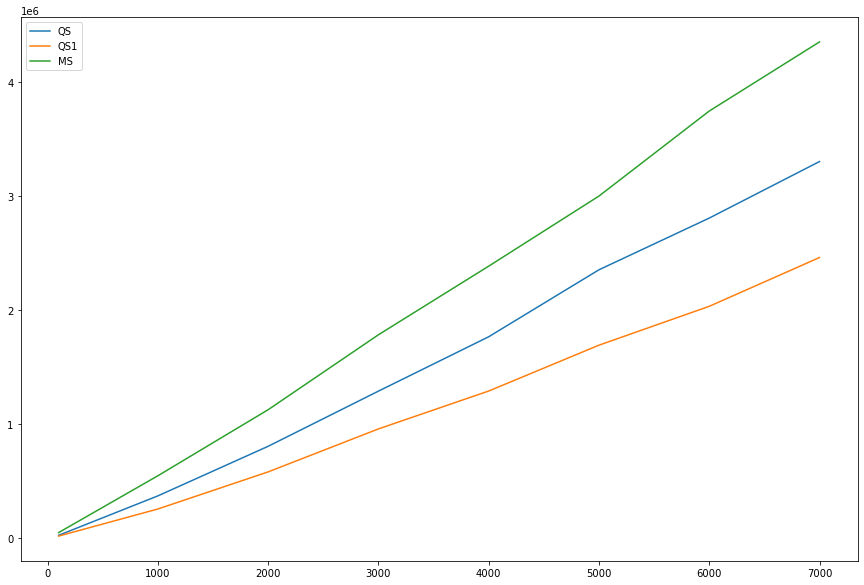

In [78]:
#standard
STL = [2234,31391,68435,111965,151909,197017,244920,296511]
IS = [47230,4347417,17213931,39799083,70026916,110974583,159698892,215815064]
QS = [24176,369733,804331,1287693,1764114,2351162,2804133,3299814]
QS1 = [17376,254852,579969, 956607,1288595,1690449,2030946,2458707]
MS = [47976,546042,1124810,1781509,2382906,2997215,3742317,4348012] 

X = [100,1000, 2000,3000,4000,5000,6000,7000]
#plt.plot(X,STL, label='STL')
plt.plot(X,QS, label='QS')
#plt.plot(X,IS, label='IS')
plt.plot(X,QS1, label='QS1')
plt.plot(X,MS, label='MS')

plt.legend()

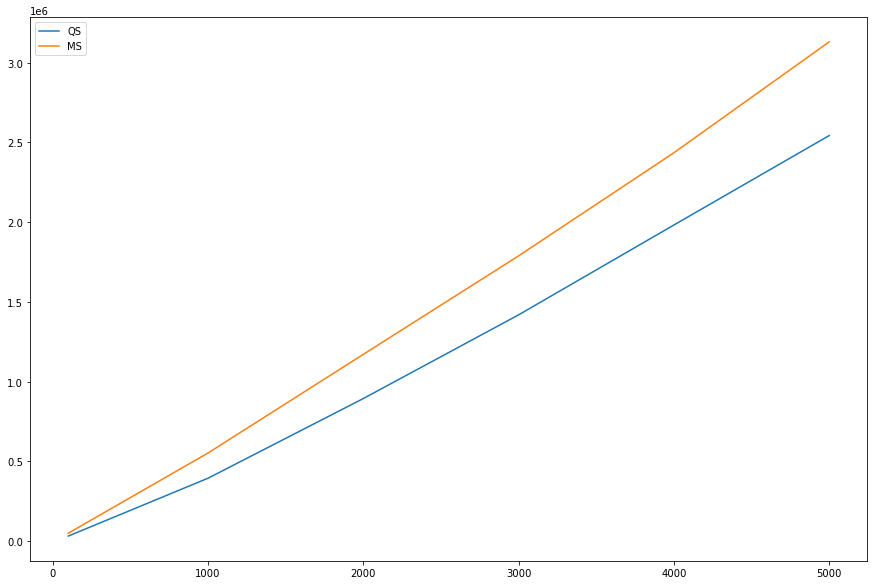

In [71]:
#random
STL = [2283,31937,69842,117224,151454,200728]
IS = [50787,6758885,27912929,57118705,99165978,148764046]
QS = [30655,393554,893297,1418128,1981639,2542636]
QS1 = [25900, ]
MS = [48557,551716,1170352,1788056,2434697,3130105]
X = [100,1000, 2000,3000,4000,5000]
#plt.plot(X,STL, label='STL')
plt.plot(X,QS, label='QS')
#plt.plot(X,IS, label='IS')
plt.plot(X,MS, label='MS')
plt.legend()

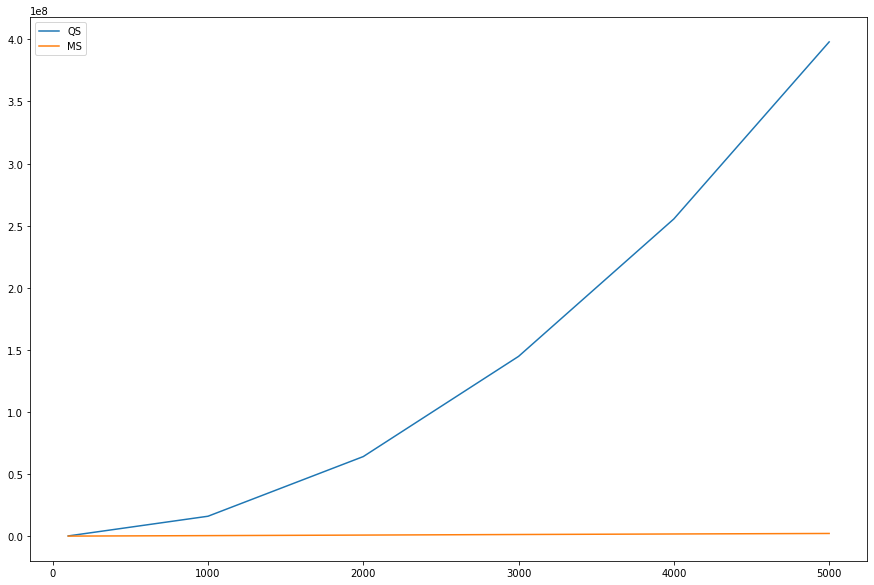

In [72]:
#sorted
STL = [310,1567,2870,4205,5489,6815]
IS = [2456,22604,44837,68374,89968,112042]
QS = [170876,16027772,64076748,144768240,255448318,397985693]
MS = [38194,413722,851763,1309844,1737157,2152024] 
X = [100,1000, 2000,3000,4000,5000]
#plt.plot(X,STL, label='STL')
plt.plot(X,QS, label='QS')
#plt.plot(X,IS, label='IS')
plt.plot(X,MS, label='MS')
plt.legend()

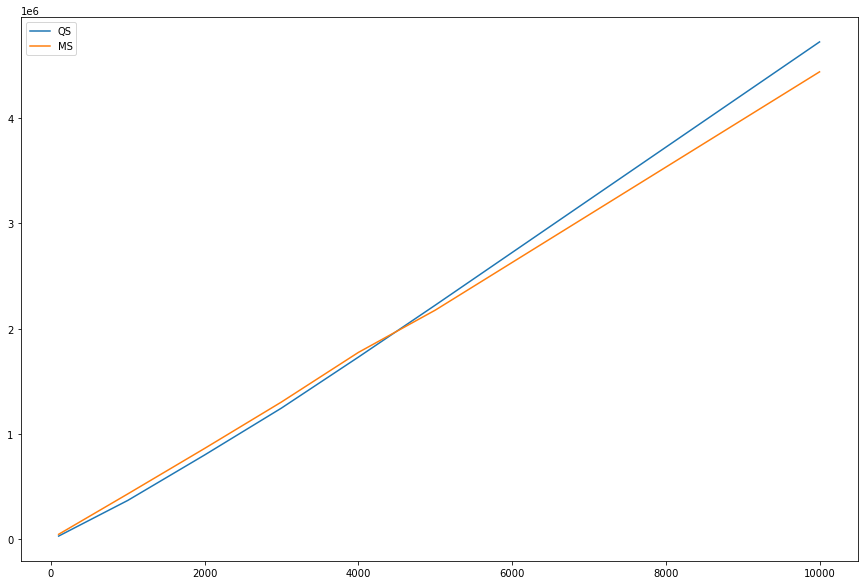

In [73]:
#sorted + random
STL = [328,1556,2852,4125,5469,6753,13324]
IS = [2446,22662,44867,66924,90077,114152,225080]
QS = [25614,365092,797533,1243880,1728355,2222539,4727461]
MS = [42451,427001,859891,1301663,1773123,2175167,4442688]
X = [100,1000, 2000,3000,4000,5000,10000]
#plt.plot(X,STL, label='STL')
plt.plot(X,QS, label='QS')
#plt.plot(X,IS, label='IS')
plt.plot(X,MS, label='MS')
plt.legend()

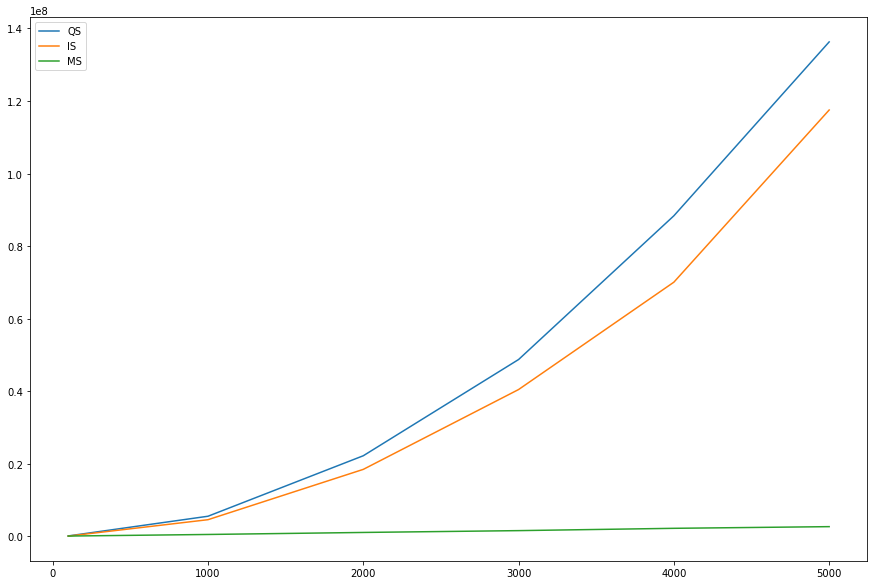

In [74]:
#pochi valori diversi + random ---> dopo poche iterazioni si trova ad ordinare vettori tutti uguali => sottoproblemi non bilanciati (anche con randomized QS)
STL = [1004,6843,13625,20324,27440,32717]
IS = [35392,4557546,18429146,40441270,70037636,117504866]
QS = [80297,5508853,22185783,48715741,88342562,136279834]
MS = [45453,482517,1039393,1541585,2178499,2638178]

X = [100,1000, 2000,3000,4000,5000]
#plt.plot(X,STL, label='STL')
plt.plot(X,QS, label='QS')
plt.plot(X,IS, label='IS')
plt.plot(X,MS, label='MS')
plt.legend()